In [11]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [12]:
# read in the data
df = pd.read_csv('/Users/hayleeham/Documents/what-is-a-data-scientist/data/multipleChoiceResponses.csv', \
                 low_memory=False)

In [13]:
[print(item) for item in zip(df.columns, df.iloc[0])]

('Time from Start to Finish (seconds)', 'Duration (in seconds)')
('Q1', 'What is your gender? - Selected Choice')
('Q1_OTHER_TEXT', 'What is your gender? - Prefer to self-describe - Text')
('Q2', 'What is your age (# years)?')
('Q3', 'In which country do you currently reside?')
('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
('Q5', 'Which best describes your undergraduate major? - Selected Choice')
('Q6', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
('Q6_OTHER_TEXT', 'Select the title most similar to your current role (or most recent title if retired): - Other - Text')
('Q7', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
('Q7_OTHER_TEXT', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text')
('Q8', 'How many years of experience

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [79]:
df['Q26'].unique()

array(['Do you consider yourself to be a data scientist?', 'Maybe',
       'Definitely not', 'Definitely yes', 'Probably yes', 'Probably not',
       nan], dtype=object)

In [88]:
# Are you a data scientist?
df_yes = df[df['Q26'] == 'Definitely yes']
df_no = df[df['Q26'] == 'Definitely not']
df_probably_yes = df[df['Q26'] == 'Probably yes']
df_probably_not = df[df['Q26'] == 'Probably not']
df_maybe = df[df['Q26'] == 'Maybe']

In [122]:
# Q11
# Analyze and understand data to influence product or business decisions
# Build and/or run a machine learning service that operationally improves my product or workflows
# Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data
# Build prototypes to explore applying machine learning to new areas
# Do research that advances the state of the art of machine learning
# None of these activities are an important part of my role at work

# Q34
# 1- Gathering data
# 2- Cleaning data
# 3- Visualizing data
# 4- Model building/model selection
# 5- Putting the model into production
# 6- Finding insights in the data and communicating with stakeholders

## Make a joyplot of time spent for yes DS vs not DS

In [16]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [17]:
df_joy_yes = df_yes[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_yes['Q34_Part_1'] = pd.to_numeric(df_joy_yes['Q34_Part_1'])
df_joy_yes['Q34_Part_2'] = pd.to_numeric(df_joy_yes['Q34_Part_2'])
df_joy_yes['Q34_Part_3'] = pd.to_numeric(df_joy_yes['Q34_Part_3'])
df_joy_yes['Q34_Part_4'] = pd.to_numeric(df_joy_yes['Q34_Part_4'])
df_joy_yes['Q34_Part_5'] = pd.to_numeric(df_joy_yes['Q34_Part_5'])
df_joy_yes['Q34_Part_6'] = pd.to_numeric(df_joy_yes['Q34_Part_6'])
df_joy_yes = df_joy_yes.dropna()
df_joy_yes = df_joy_yes.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

df_joy_no = df_no[['Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5','Q34_Part_6']].iloc[1:]
# df_joy['Q34_Part_1'] = astype)
df_joy_no['Q34_Part_1'] = pd.to_numeric(df_joy_no['Q34_Part_1'])
df_joy_no['Q34_Part_2'] = pd.to_numeric(df_joy_no['Q34_Part_2'])
df_joy_no['Q34_Part_3'] = pd.to_numeric(df_joy_no['Q34_Part_3'])
df_joy_no['Q34_Part_4'] = pd.to_numeric(df_joy_no['Q34_Part_4'])
df_joy_no['Q34_Part_5'] = pd.to_numeric(df_joy_no['Q34_Part_5'])
df_joy_no['Q34_Part_6'] = pd.to_numeric(df_joy_no['Q34_Part_6'])
df_joy_no = df_joy_no.dropna()
df_joy_no = df_joy_no.rename(index=str, columns={'Q34_Part_1':'Gathering data','Q34_Part_2':'Cleaning data',\
                                      'Q34_Part_3':'Visualizing data','Q34_Part_4':'Model building',\
                                      'Q34_Part_5':'Model -> production','Q34_Part_6':'Finding insights/comm'})

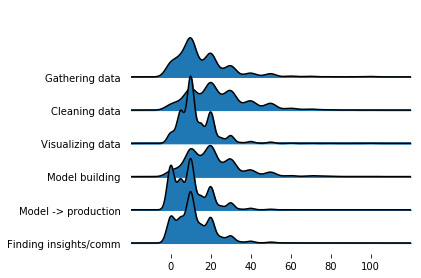

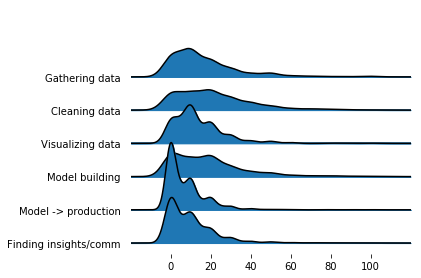

In [18]:
%matplotlib inline
fig, axes = joypy.joyplot(df_joy_yes)
fig, axes = joypy.joyplot(df_joy_no)

## Meeting with Mike
Approach like a multivariate problem   
Do principal components and see if you can reduce the dimension further.   
Chi square test is difference in proportions. So it would be share of events in two conditions. People falling into certain bucket.   
For Q11 -- use binomial for each one -- whether or not they marked it. -- You are comparing two treatments -- but is there an expanded one for multiple categories but probably not work for being able to mark multiple.   
They are responding with proportions so that is weird for the Chi square   
Mahalobis distance -- converting to probability space
-- don't average the obvservations
multivariate t-test using original vectors or multivariate regression   
PCA to understand which vectors explain most of the variance   

PCA all original vectors -- no averaging   
Multi t-test all original vectors -- no averaging

In [167]:
# create labeled sets for definitely yes and definitely not
df_yes_Q34 = df_yes[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_no_Q34 = df_no[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_yes_Q34 = df_yes_Q34[~pd.isnull(df_yes_Q34['Q34_Part_1'])]
df_no_Q34 = df_no_Q34[~pd.isnull(df_no_Q34['Q34_Part_1'])]

df_yes_Q34['DS'] = 1
df_no_Q34['DS'] = 0

df_Q34 = df_yes_Q34.append(df_no_Q34)

In [168]:
# create labeled sets for probably yes and probably not
df_probably_yes_Q34 = df_probably_yes[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_probably_not_Q34 = df_probably_not[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_probably_yes_Q34 = df_probably_yes_Q34[~pd.isnull(df_probably_yes_Q34['Q34_Part_1'])]
df_probably_not_Q34 = df_probably_not_Q34[~pd.isnull(df_probably_not_Q34['Q34_Part_1'])]

df_probably_yes_Q34['DS'] = 1
df_probably_not_Q34['DS'] = 0

df_probably_Q34 = df_probably_yes_Q34.append(df_probably_not_Q34)



In [169]:
# create set for maybe DS
df_maybe_Q34 = df_maybe[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']].copy()
df_maybe_Q34 = df_maybe_Q34[~pd.isnull(df_maybe_Q34['Q34_Part_1'])]



In [170]:
## PCA -- drop last category and run on remaining in order to reduce dimensionality
## nice if you can reduce down to two dimensions so you can look at plots
## X data is Q_34
## Y data is Q_26

import numpy as np
from sklearn.decomposition import PCA
X = df_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
Y = df_Q34[['DS']]
pca = PCA()
pca.fit(X)  
X = pca.transform(X)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_)

[0.34944271 0.30078755 0.16232807 0.12396402 0.06347765]
[1287.34090964 1194.36069628  877.40960753  766.74931731  548.67603265]


In [171]:
# use first two components and plot everything with color for DS status
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(dict(
    x=X[:, 0],
    y=X[:, 1],
    colors = ['red' if target == 1 else 'blue' for target in Y['DS'].tolist()],
    labels = ['Yes DS' if target == 1 else 'No DS' for target in Y['DS'].tolist()]
))

p = figure()

p.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.6,
          line_color=None, legend='labels', source=source)

show(p)


Loading BokehJS ...

In [172]:
# Q34
# 1- Gathering data
# 2- Cleaning data
# 3- Visualizing data
# 4- Model building/model selection
# 5- Putting the model into production
# 6- Finding insights in the data and communicating with stakeholders

# which features are the most important? Each row is a PC and each column is a variable
# Looking at PC1 -- variables 2 and 4 are the most important.
# These variables are cleaning data and model building/model selection
print(pca.components_)

[[-0.23785272 -0.6691907  -0.02135723  0.6867259   0.15349689]
 [ 0.76676659 -0.56719612 -0.054047   -0.29457352  0.02574722]
 [-0.48366053 -0.38257019  0.45974774 -0.58400259  0.25939454]
 [-0.11861509  0.03205565 -0.70793698 -0.18191073  0.67129473]
 [ 0.32786893  0.28824442  0.53299159  0.25977575  0.67664883]]


In [173]:
# t-test with first component and DS/non-DS
# PC1 seems to be capturing the difference between cleaning data and model building/model selection.
# The direction of the t-test is consistent with the idea that PC1 is capturing seniority level or skill level
# and that Yes DS has a higher average PC1 value than No DS
# PC2 is differentiating between data gathering vs data cleaning & model building/modeling selection. 
# Possibly even lower seniority or maybe just a different role altogether.
from scipy import stats
stats.ttest_ind(X[:4201, 0],X[4201:, 0])

Ttest_indResult(statistic=-5.156169366514056, pvalue=2.611463633467223e-07)

In [174]:
# Yes DS mean of PC
sum(X[:4201, 0])/len(X[:4201, 0])

-0.5991139901781496

In [175]:
# No DS mean of PC
sum(X[4201:, 0])/len(X[4201:, 0])

2.209725963773842

In [243]:
# Run PCA for all responses to Q11
df_pca = df.iloc[1:,]
df_pca = df_pca[~pd.isnull(df_pca['Q34_Part_1'])]
y_pca = df_pca['Q26']
X_pca = df_pca[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
pca_pca = PCA()
pca_pca.fit(X_pca)  
X_pca = pca.transform(X_pca)
print(pca_pca.explained_variance_ratio_) 
print(pca_pca.singular_values_)
print(pca.components_)

[0.35244062 0.29735961 0.16549459 0.12482737 0.05987781]
[2232.91206153 2051.01873926 1530.10255992 1328.87320052  920.36820255]
[[-0.23785272 -0.6691907  -0.02135723  0.6867259   0.15349689]
 [ 0.76676659 -0.56719612 -0.054047   -0.29457352  0.02574722]
 [-0.48366053 -0.38257019  0.45974774 -0.58400259  0.25939454]
 [-0.11861509  0.03205565 -0.70793698 -0.18191073  0.67129473]
 [ 0.32786893  0.28824442  0.53299159  0.25977575  0.67664883]]


In [248]:
# use first two components and plot everything with color for DS status
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(dict(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    colors = ['#0B6623' if target == 'Definitely yes' else '#800000' if target == 'Definitely not' else '#FFE119' if target == 'Maybe' else '#FF0012' if target == 'Probably not' else '#00FF3E' for target in y_pca.tolist()],
    labels = ['Definitely yes' if target == 'Definitely yes' else 'Definitely not' if target == 'Definitely not' else 'Maybe' if target == 'Maybe' else 'Probably not' if target == 'Probably not' else 'Probably yes' for target in y_pca.tolist()]
))

p = figure()

p.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.6,
          line_color=None, legend='labels', source=source)

show(p)


Loading BokehJS ...

In [176]:
# make the data types numeric for T2 test
for col in ['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']:
    df_no_Q34[col] = pd.to_numeric(df_no_Q34[col])
    df_yes_Q34[col] = pd.to_numeric(df_yes_Q34[col])
    df_probably_not_Q34[col] = pd.to_numeric(df_probably_not_Q34[col])
    df_probably_yes_Q34[col] = pd.to_numeric(df_probably_yes_Q34[col])
    df_maybe_Q34[col] = pd.to_numeric(df_maybe_Q34[col])

In [178]:
# Hotelling's T2 test -- the means of the time spent vectors are statistically different between ALL groups
import os
from matplotlib import pyplot
import spm1d

# numpy array of arrays for each sample using original data
ds_array = np.array(df_yes_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']])
no_ds_array = np.array(df_no_Q34[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']])

# using first two PCs
# ds_array_pca, no_ds_array_pca = X[:4201, :2],X[4201:, :2]

# Conduct test:
alpha        = 0.05
T2           = spm1d.stats.hotellings2(ds_array, no_ds_array)
T2i          = T2.inference(alpha)

print(T2i)




SPM{T2} (0D) inference
   SPM.z        :  386.07369
   SPM.df       :  (6.0, 5338.0)
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  12.61355
   SPM.h0reject :  True
   SPM.p        :  0.00000




In [138]:
# Now, let's see how each variable actually differs between group

# what about just a simple student's t test between the original vectors?
df_names = ['df_yes', 'df_probably_yes', 'df_maybe', 'df_probably_not', 'df_no']
col_names = ['Gathering data', 'Cleaning data', 'Visualizing data', 'Model building/model selection',
          'Putting the model into production', 'Finding insights / communicating with stakeholders']
for i1, df1 in enumerate([df_yes_Q34, df_probably_yes_Q34, df_maybe_Q34, df_probably_not_Q34, df_no_Q34]):
    for i2, df2 in enumerate([df_yes_Q34, df_probably_yes_Q34, df_maybe_Q34, df_probably_not_Q34, df_no_Q34]):
        if i1 >= i2:
            continue
        print(df_names[i1], '&', df_names[i2])
        for ic, col in enumerate(['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']):
            pval = stats.ttest_ind(df1[col],df2[col])[1]
            if pval < 0.05:
                if df1[col].mean() > df2[col].mean():
                    print(df_names[i1], 'spends a stat sig greater amount of time on', col_names[ic])
                elif df1[col].mean() < df2[col].mean():
                    print(df_names[i2], 'spends a stat sig greater amount of time on', col_names[ic])
        
        print('\n\n')

df_yes & df_probably_yes
df_probably_yes spends a stat sig greater amount of time on Visualizing data
df_yes spends a stat sig greater amount of time on Putting the model into production
df_yes spends a stat sig greater amount of time on Finding insights / communicating with stakeholders



df_yes & df_maybe
df_maybe spends a stat sig greater amount of time on Gathering data
df_yes spends a stat sig greater amount of time on Cleaning data
df_maybe spends a stat sig greater amount of time on Visualizing data
df_yes spends a stat sig greater amount of time on Putting the model into production
df_yes spends a stat sig greater amount of time on Finding insights / communicating with stakeholders



df_yes & df_probably_not
df_probably_not spends a stat sig greater amount of time on Gathering data
df_yes spends a stat sig greater amount of time on Cleaning data
df_probably_not spends a stat sig greater amount of time on Visualizing data
df_yes spends a stat sig greater amount of time on Mode

In [249]:
# plot based on model building and gathering data
source_orig = ColumnDataSource(dict(
    x=df_pca['Q34_Part_1'], # data gathering
    y=df_pca['Q34_Part_4'], # model building
    colors = ['#0B6623' if target == 'Definitely yes' else '#800000' if target == 'Definitely not' else '#FFE119' if target == 'Maybe' else '#FF0012' if target == 'Probably not' else '#00FF3E' for target in df_pca['Q26'].tolist()],
    labels = ['Definitely yes' if target == 'Definitely yes' else 'Definitely not' if target == 'Definitely not' else 'Maybe' if target == 'Maybe' else 'Probably not' if target == 'Probably not' else 'Probably yes' for target in df_pca['Q26'].tolist()]
))

p_orig = figure()

p_orig.scatter('x', 'y',
          fill_color='colors', fill_alpha=0.8,
          line_color=None, legend='labels', source=source_orig)

show(p_orig)

[[ -7.41988623  -4.86936213]
 [-26.55901219 -20.71124174]
 [  8.07856991   4.50678284]
 [-11.1874805   29.81846505]
 [ 29.88372111  -8.93363227]]


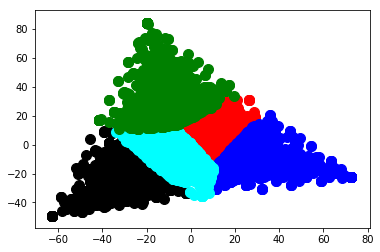

In [204]:
# and let's do some cluster analysis to see if anything interesting happens
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=5)
# use the first two PCs as the points
points = X_pca[:, :2]
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

# plot
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='green')

In [263]:
# try t-sne clustering
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

# create dataframe with integer categories for target and only vars needed
df_tsne = df_pca[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
q26_ints = [-2 if target == 'Definitely not' else -1 if target == 'Probably not' else 0 if target == 'Maybe' else 1 if target == 'Probably yes' else 2 for target in df_pca['Q26'].tolist()]
df_tsne.insert(2, "Q26", q26_ints, True) 

## Loading and curating the data
categories = ['Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes']
X = df_tsne[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
y = df_tsne['Q26']

X_2d = tsne.fit_transform(X)

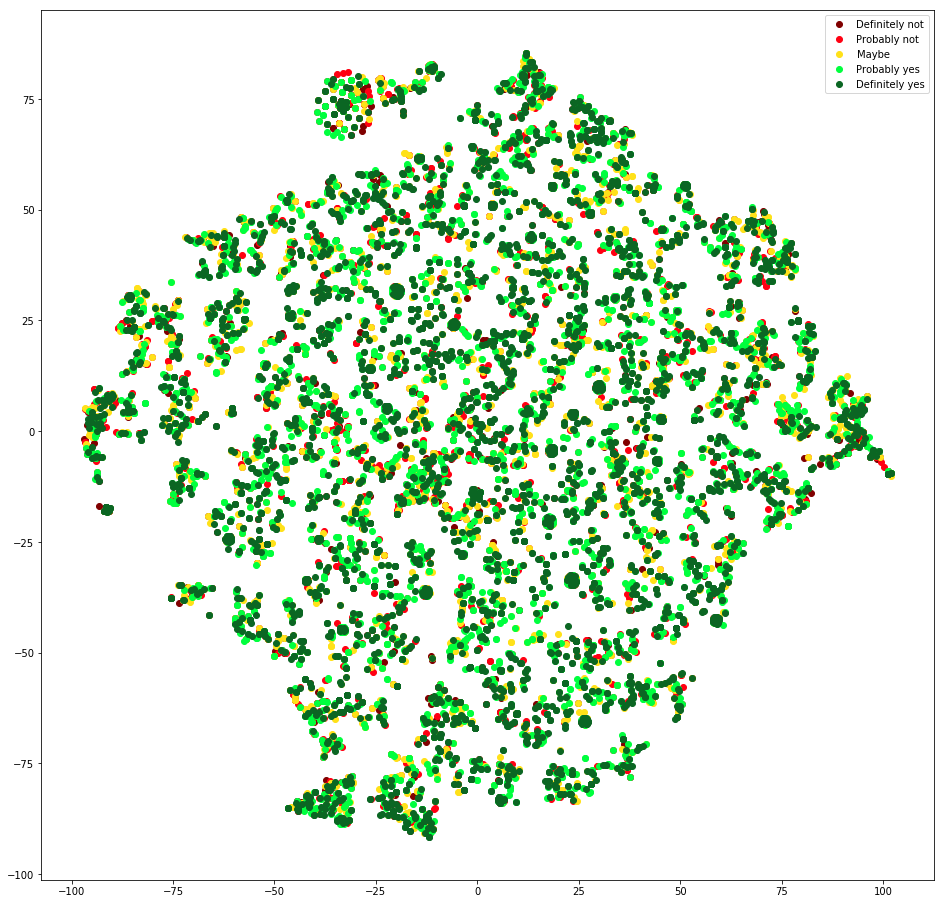

In [269]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 16))
colors = ['#800000', '#FF0012', '#FFE119', '#00FF3E', '#0B6623']
target_ids = [-2, -1, 0, 1, 2]
for i, c, label in zip(target_ids, colors, categories):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [283]:
# regress compensation on how spend time
df_comp = df[['Q9', 'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5']]
df_comp = df_comp.iloc[1:,]
df_comp = df_comp[~pd.isnull(df['Q9'])]
df_comp = df_comp[~pd.isnull(df['Q34_Part_1'])]
df_comp = df_comp[df_comp['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

/Users/hayleeham/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/hayleeham/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [284]:
# regress compensation on how spend time
# string to int for compensation levels
df_comp.head()

,Q9,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5
3,"0-10,000",2,3,20,50,20
5,"0-10,000",10,10,20,10,20
7,"10-20,000",0,30,50,0,0
8,"0-10,000",20,30,20,20,5
10,"20-30,000",55,10,20,5,0


In [285]:
df_comp['Q9'].unique()

array(['0-10,000', '10-20,000', '20-30,000', '125-150,000', '30-40,000',
       '50-60,000', '100-125,000', '90-100,000', '70-80,000', '80-90,000',
       '60-70,000', '40-50,000', '150-200,000', '500,000+', '300-400,000',
       '200-250,000', '400-500,000', '250-300,000'], dtype=object)